In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [2]:
data = pd.read_csv('/content/data_for_lr.csv')
data = data.dropna()

X_train = np.array(data.x[0:500]).reshape(500,1)
y_train = np.array(data.y[0:500]).reshape(500,1)

X_test = np.array(data.x[500:700]).reshape(199,1)
y_test = np.array(data.y[500:700]).reshape(199,1)

In [10]:
# linear regression
# y = m*x + c
# e += (1/n) * (y_i - (m*x + c)) ** 2
# de/dm = -(1/n)*2*x(y_i - (m*x + c))
# de/dc = -(1/n)*2*(y_i - (m*x + c))
# m = m - lr*de/dm
# c = c - lr*de/dc
# ok let's do it then

import numpy as np
import matplotlib.pyplot as plt

class Linear_regression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, X_train):
        m = self.parameters['m']
        c = self.parameters['c']
        prediction = np.multiply(m, X_train) + c
        return prediction

    def backward_propagation(self, X_train, y_train, predictions):
        derivatives = {}
        df = (predictions - y_train)
        dm = 2 * np.mean(np.multiply(X_train, df))
        dc = 2 * np.mean(df)

        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def cost_function(self, predictions, y_train):
        cost = np.mean((y_train - predictions) ** 2)
        return cost

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] -= learning_rate * derivatives['dm']
        self.parameters['c'] -= learning_rate * derivatives['dc']

    def train(self, X_train, y_train, learning_rate=0.01, iters=100):
        # Initialize parameters
        self.parameters['m'] = np.random.randn()
        self.parameters['c'] = np.random.randn()

        self.loss = []

        # Training loop
        for i in range(iters):
            predictions = self.forward_propagation(X_train)
            cost = self.cost_function(predictions, y_train)
            derivatives = self.backward_propagation(X_train, y_train, predictions)
            self.update_parameters(derivatives, learning_rate)
            self.loss.append(cost)

            if i % 10 == 0 or i == iters - 1:
                print(f"Iteration {i+1}/{iters} | Loss = {cost:.4f}")

        # Plot regression line
        plt.scatter(X_train, y_train, color='k', label='Training Data')
        x_vals = np.linspace(min(X_train), max(X_train), 100)
        y_vals = self.parameters['m'] * x_vals + self.parameters['c']
        plt.plot(x_vals, y_vals, color='red', label='Fitted Line')
        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression Fit')
        plt.legend()
        plt.show()

        # Plot loss curve
        plt.plot(self.loss)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Loss Convergence')
        plt.show()


Iteration 1/20 | Loss = 56.2634
Iteration 11/20 | Loss = 8.5976
Iteration 20/20 | Loss = 8.5969


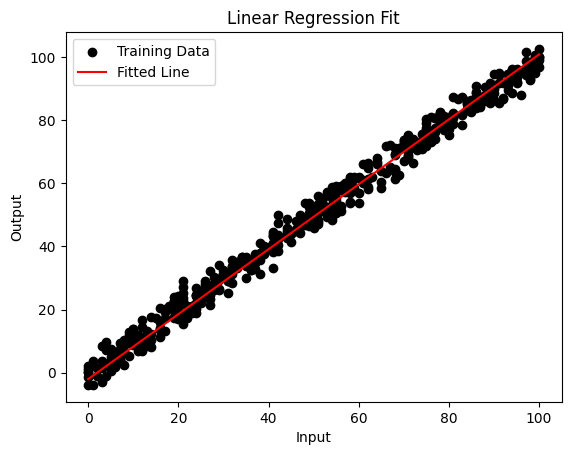

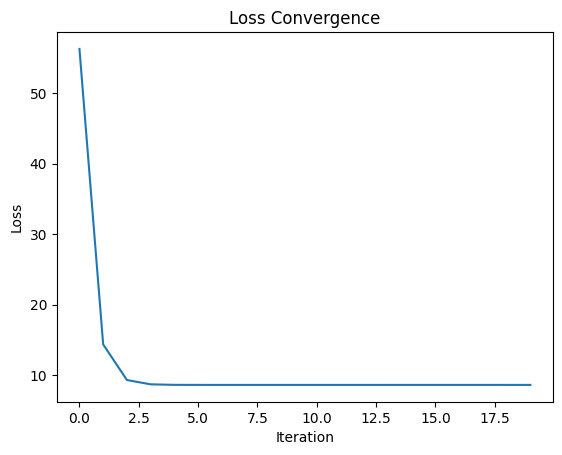

In [9]:
model = Linear_regression()
model.train(X_train, y_train, 0.0001, 20)